Dataset Information
(Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data)

* **`gender`** : sex of students -> (Male/female)
* **`race/ethnicity`** : ethnicity of students -> (Group A, B,C, D,E)
* **`parental level of education`** : parents' final education ->(bachelor's * degree,some college,master's degree,associate's degree,high school)
* **`lunch`** : having lunch before test (standard or free/reduced)
* **`test preparation course`** : complete or not complete before test
* **`math score`**
* **`reading score`**
* **`writing score`**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_csv('data/stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [3]:
df.shape

(1000, 8)

consisting of **1000 rows** and **8 columns**

In [4]:
# checking the missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in Dataset

In [5]:
# checking duplicated values
df.duplicated().sum()

0

There are no duplicated values in Dataset

In [6]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:
* All the mean are close to each other, which is between 66 to 69.
* All the standard deviations are also close to each other - 14.6 to 15.19.
* min for math, reading and writting are 0, 17 and 10 respectively.

In [9]:
# seperating dataset into categorical_col and numerical_col
categorical_col = df.select_dtypes(include=['object']).columns
mumerical_col = df.select_dtypes(exclude=['object']).columns

In [10]:
categorical_col

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [11]:
mumerical_col

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [12]:
for i in categorical_col:
    unique_values = df[i].unique()
    print("Column: ", i)
    print(unique_values)
    print('='*10)
    #print('\n')

Column:  gender
['female' 'male']
Column:  race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
Column:  parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column:  lunch
['standard' 'free/reduced']
Column:  test_preparation_course
['none' 'completed']


In [13]:
# adding "total_score" and "average" columns
df["total_score"] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df["total_score"]/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [14]:
# checking the full scores of each subject
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writting_full = df[df['writing_score'] == 100]['average'].count()

# checking the less than 20 scores of each subject
math_less = df[df['math_score'] <= 20]['average'].count()
reading_less = df[df['reading_score'] <= 20]['average'].count()
writting_less = df[df['writing_score'] <= 20]['average'].count()

print('In Math, Number of students with full marks: {0}, while with less than 20 marks are {1}.'.format(math_full,math_less))
print('In Reading, Number of students with full marks: {0}, while with less than 20 marks are {1}.'.format(reading_full,reading_less))
print('In Writting, Number of students with full marks: {0}, while with less than 20 marks are {1}.'.format(writting_full,writting_less))

In Math, Number of students with full marks: 7, while with less than 20 marks are 4.
In Reading, Number of students with full marks: 17, while with less than 20 marks are 1.
In Writting, Number of students with full marks: 14, while with less than 20 marks are 3.


Insights:
* Students has performed the worst in Maths
* Best performance is in reading section.

### Data Visualization

Text(0.5, 0.98, 'Comparison of Average')

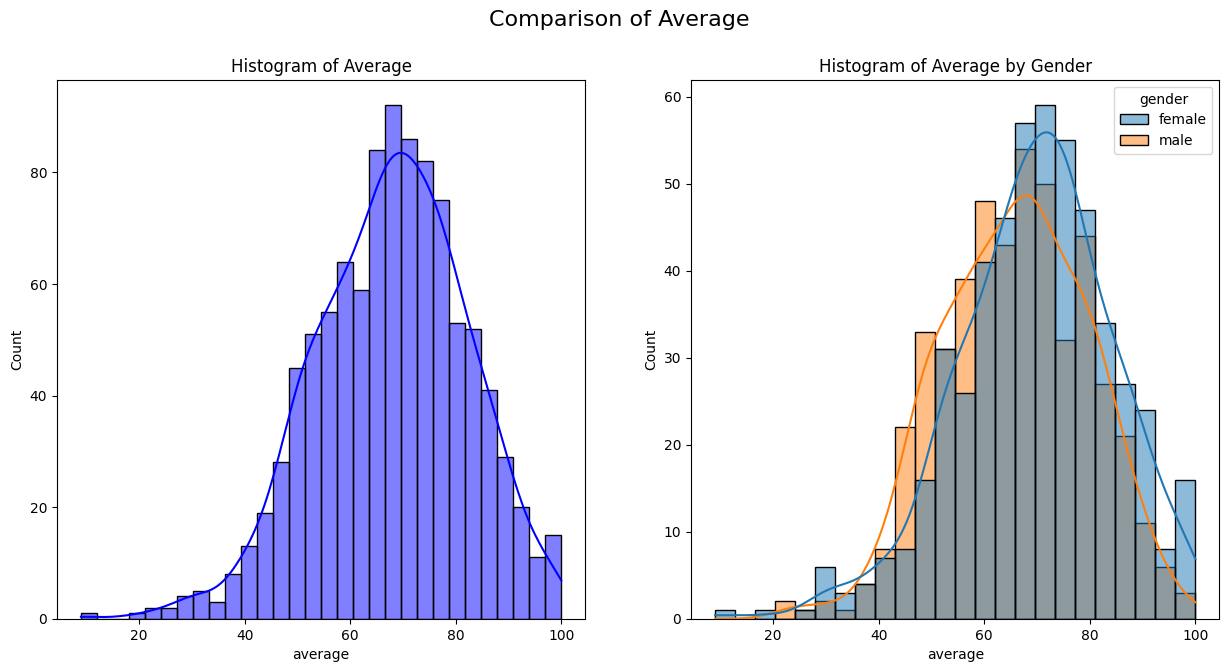

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color ='b')
plt.title('Histogram of Average')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue = 'gender')
plt.title('Histogram of Average by Gender')
plt.suptitle('Comparison of Average', fontsize=16)

Text(0.5, 0.98, 'Comparison of Total Scores')

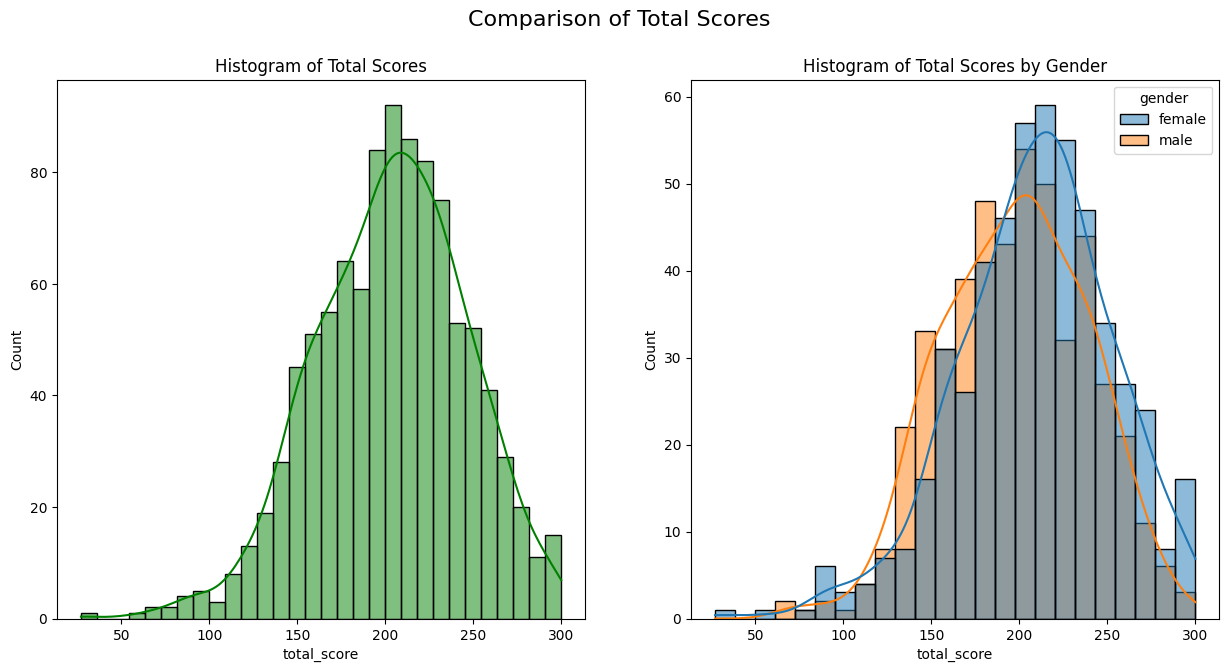

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color ='g')
plt.title('Histogram of Total Scores')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue = 'gender')
plt.title('Histogram of Total Scores by Gender')
plt.suptitle('Comparison of Total Scores', fontsize=16)

Female students tend to perform well then male students

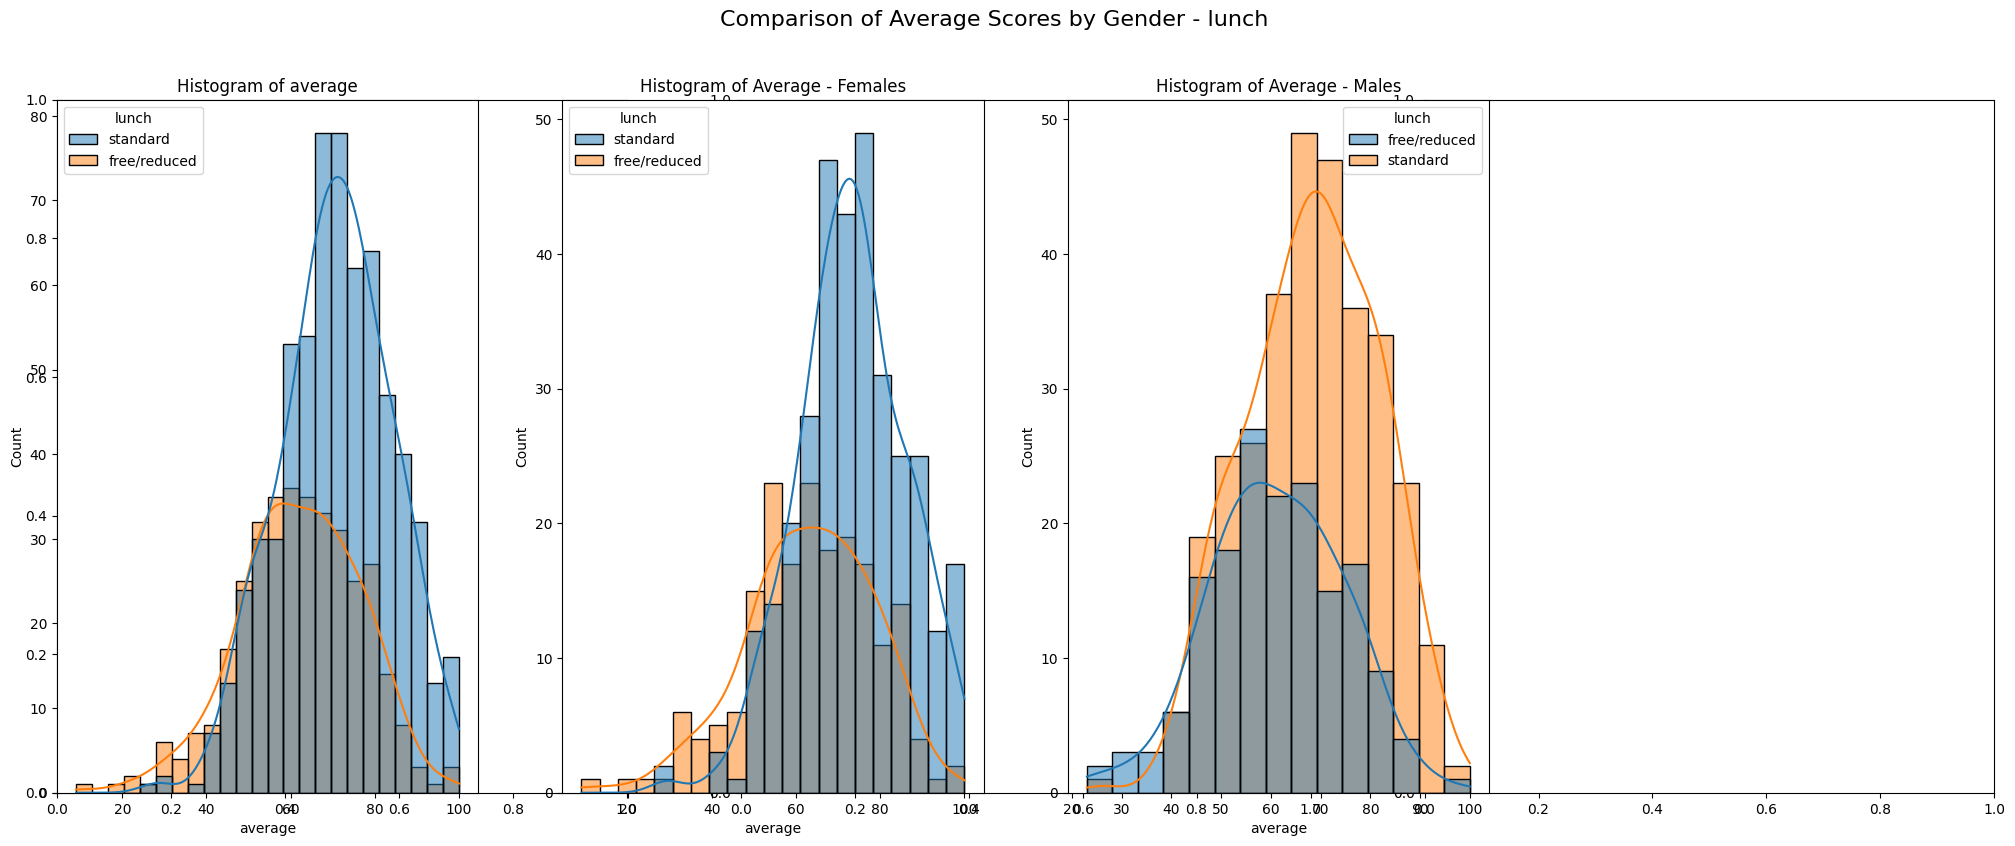

In [26]:
plt.subplots(1,3, figsize=(25,9))
plt.subplot(141)
sns.histplot(data = df, x='average', kde=True, hue = 'lunch')
plt.title('Histogram of average')

plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde = True, hue = 'lunch')
plt.title('Histogram of Average - Females')

plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde = True, hue = 'lunch')
plt.title('Histogram of Average - Males')
plt.suptitle('Comparison of Average Scores by Gender - lunch', fontsize=16)
plt.show()

* Standard lunch helps perform well in exams.
* Standard lunch helps both male and female perform well in exams

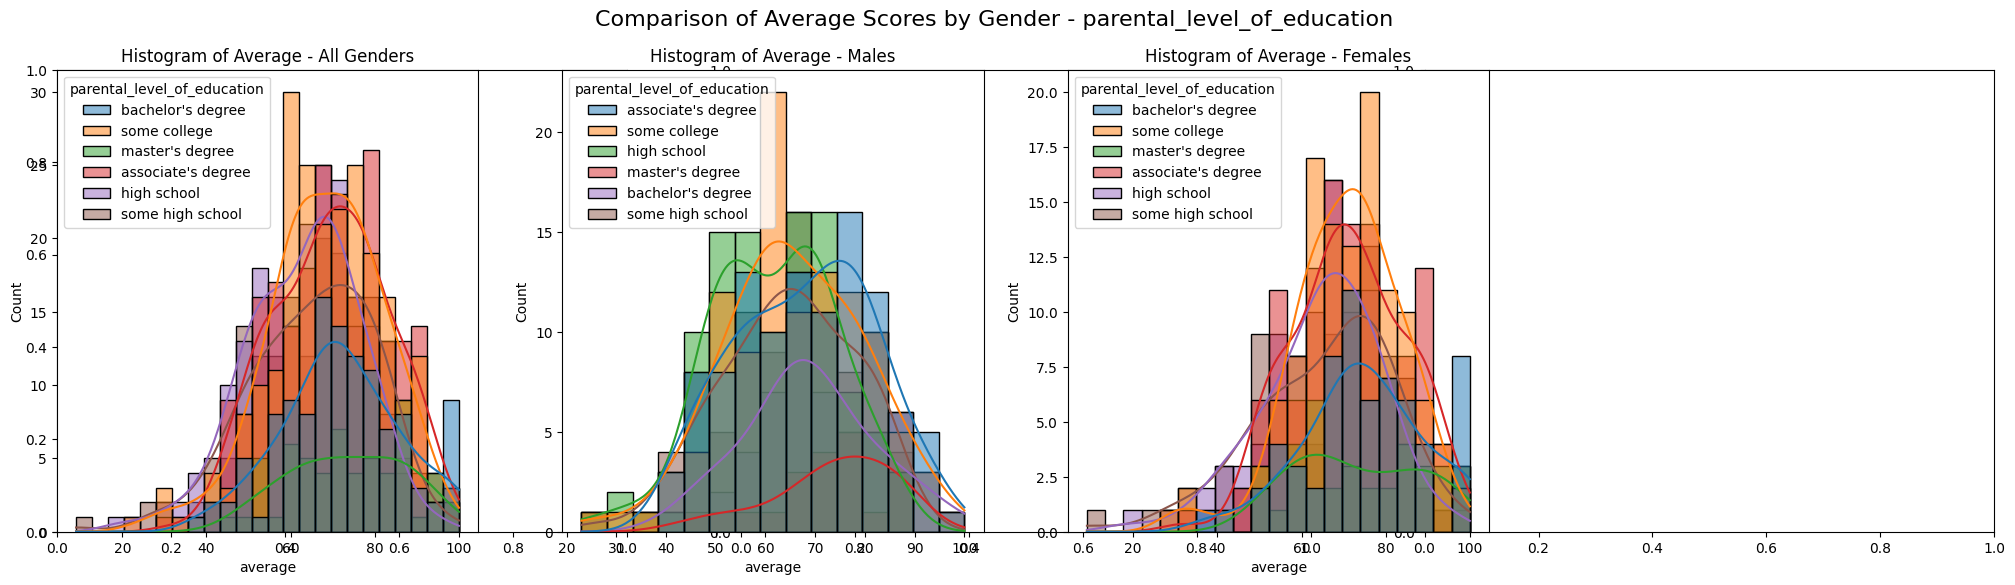

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title('Histogram of Average - All Genders')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Histogram of Average - Males')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Histogram of Average - Females')
plt.suptitle('Comparison of Average Scores by Gender - parental_level_of_education', fontsize=16)
plt.show()

Insights:
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

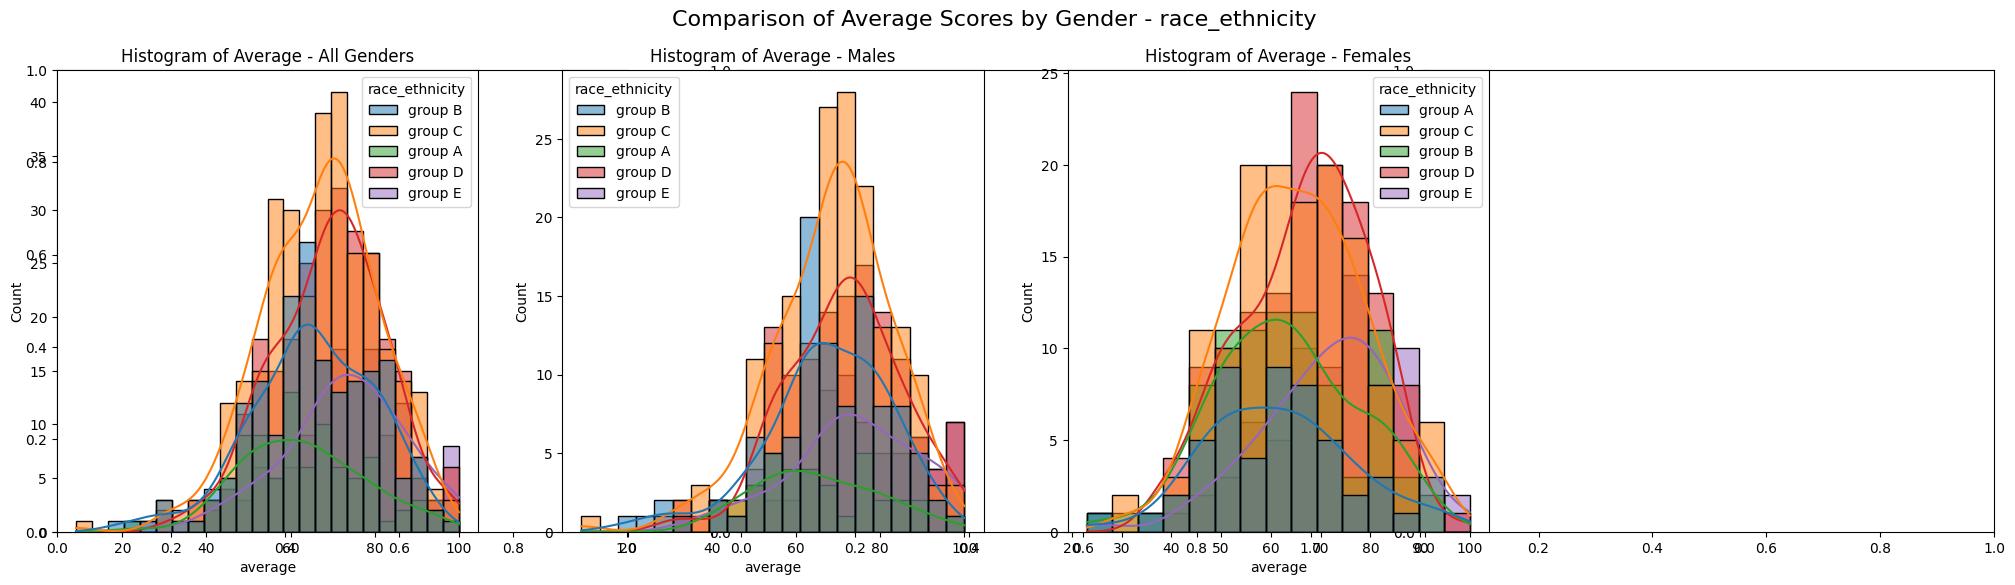

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('Histogram of Average - All Genders')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Histogram of Average - Males')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Histogram of Average - Females')
plt.suptitle('Comparison of Average Scores by Gender - race_ethnicity', fontsize=16)
plt.show()

Insights:
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


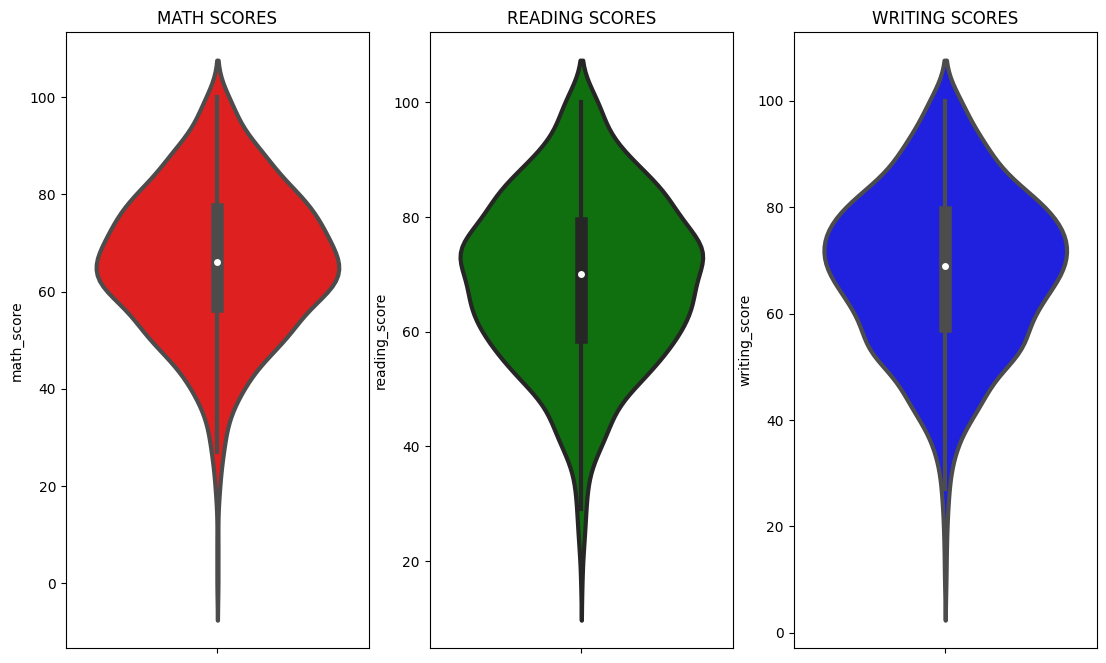

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights:
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

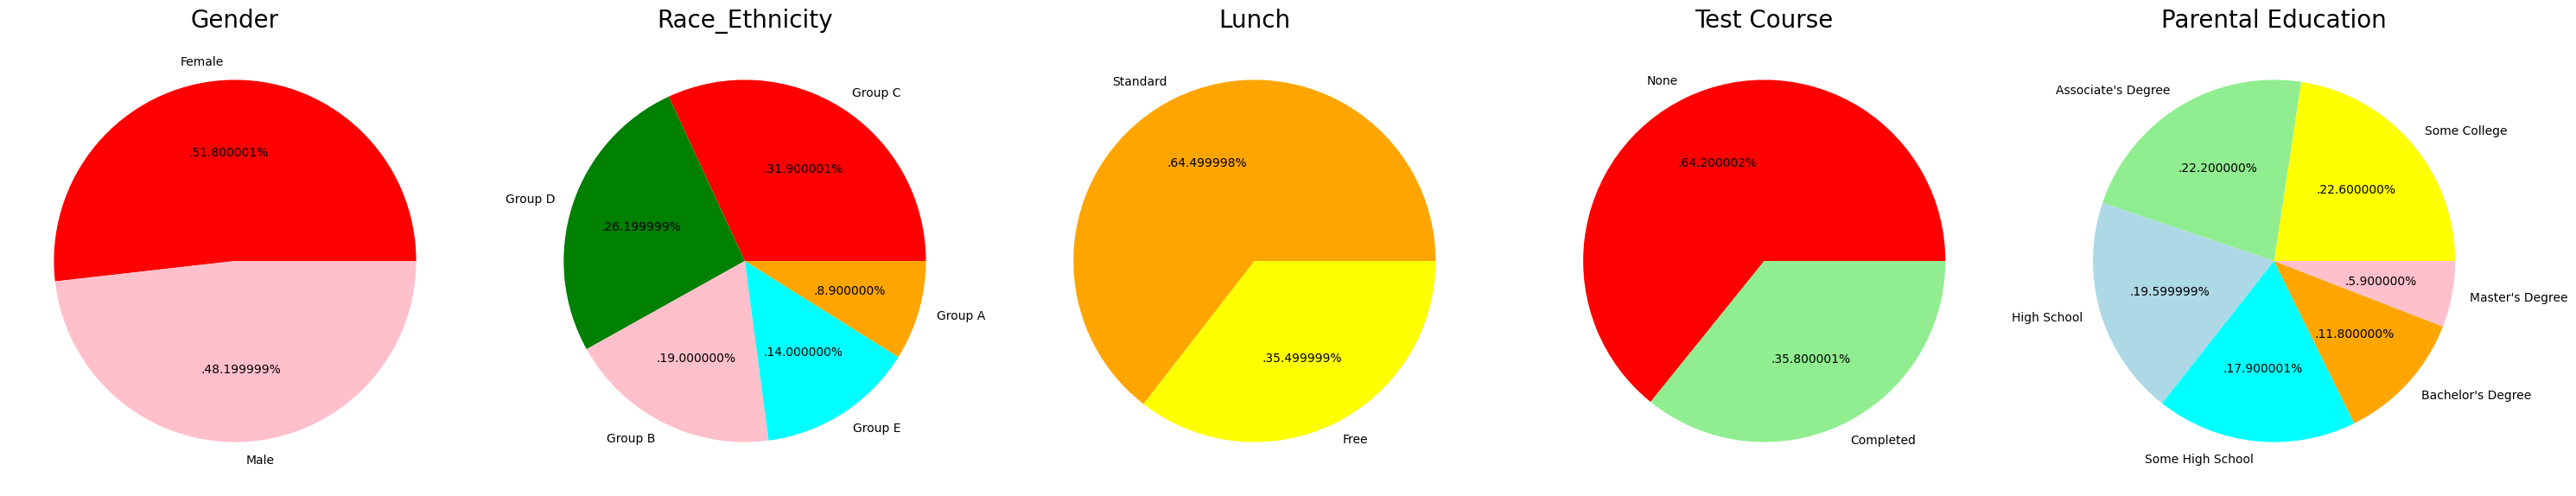

In [42]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','pink']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'pink', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['orange','yellow']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','lightgreen']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['yellow', 'lightgreen', 'lightblue', 'cyan','orange','pink']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

Insights:
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

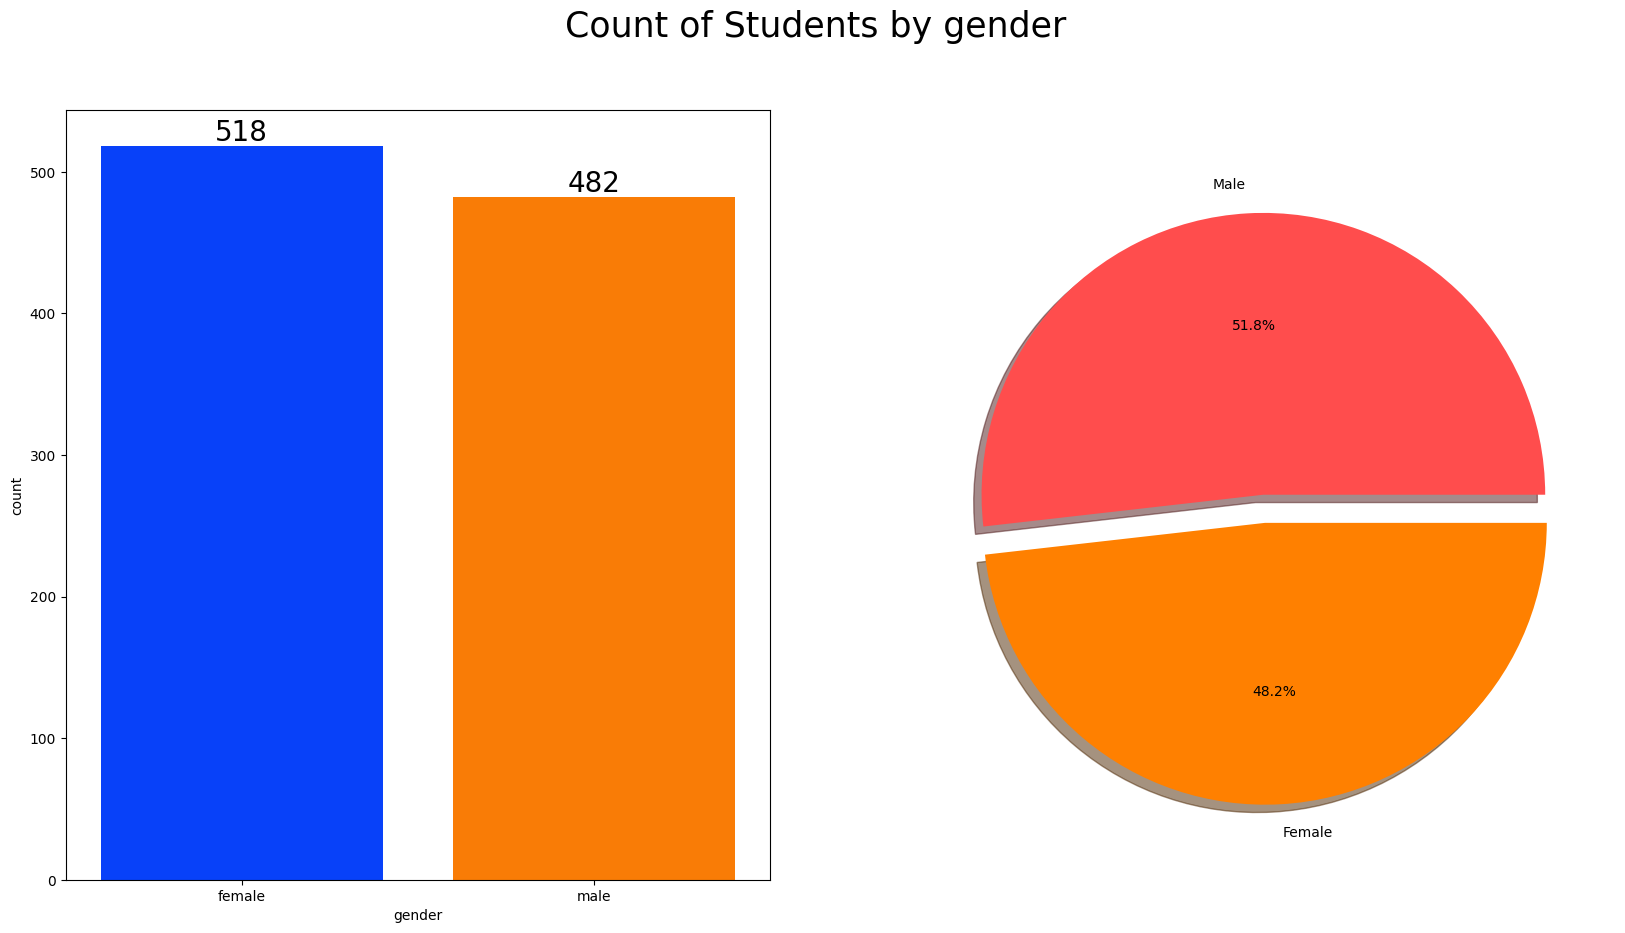

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.suptitle('Count of Students by gender', fontsize=25)
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


In [49]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
categorical_col = df.select_dtypes(include=['object']).columns  # Select categorical columns

# Calculate mean for numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()
print(gender_group)


        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


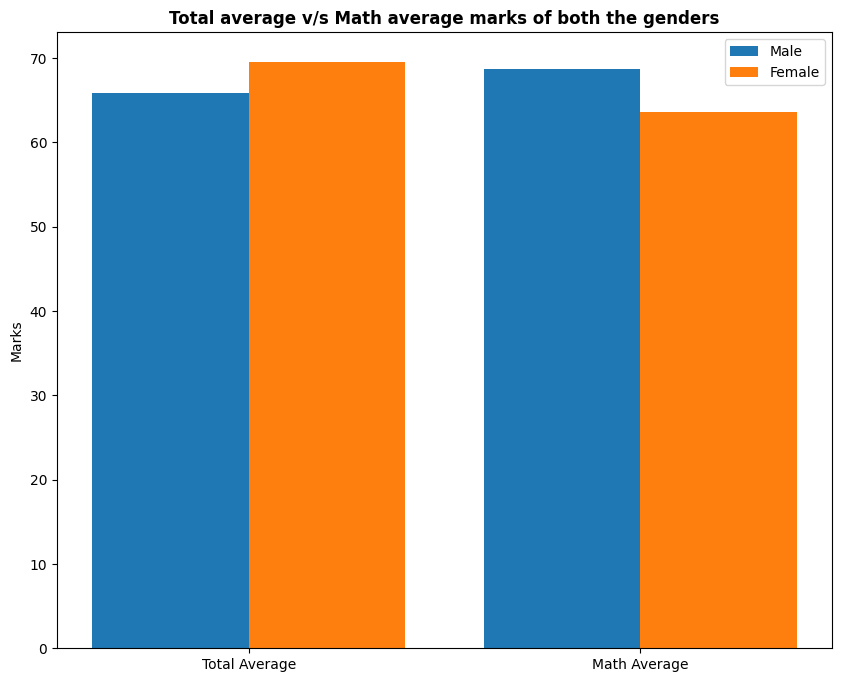

In [50]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

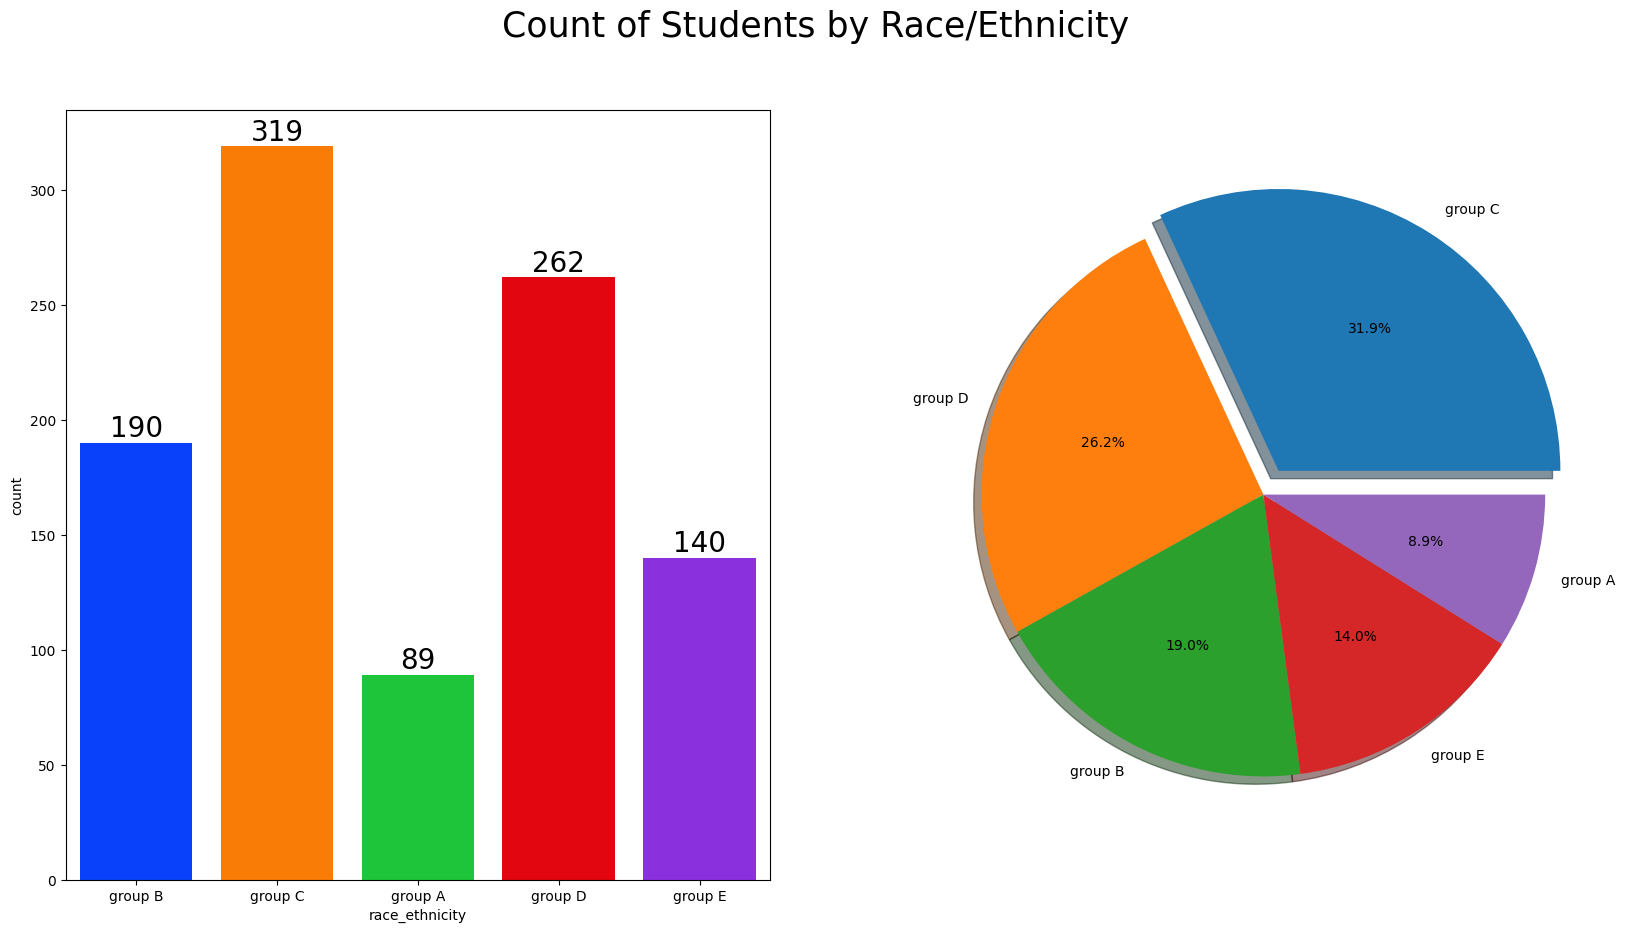

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.suptitle('Count of Students by Race/Ethnicity', fontsize=25)
plt.show() 

Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

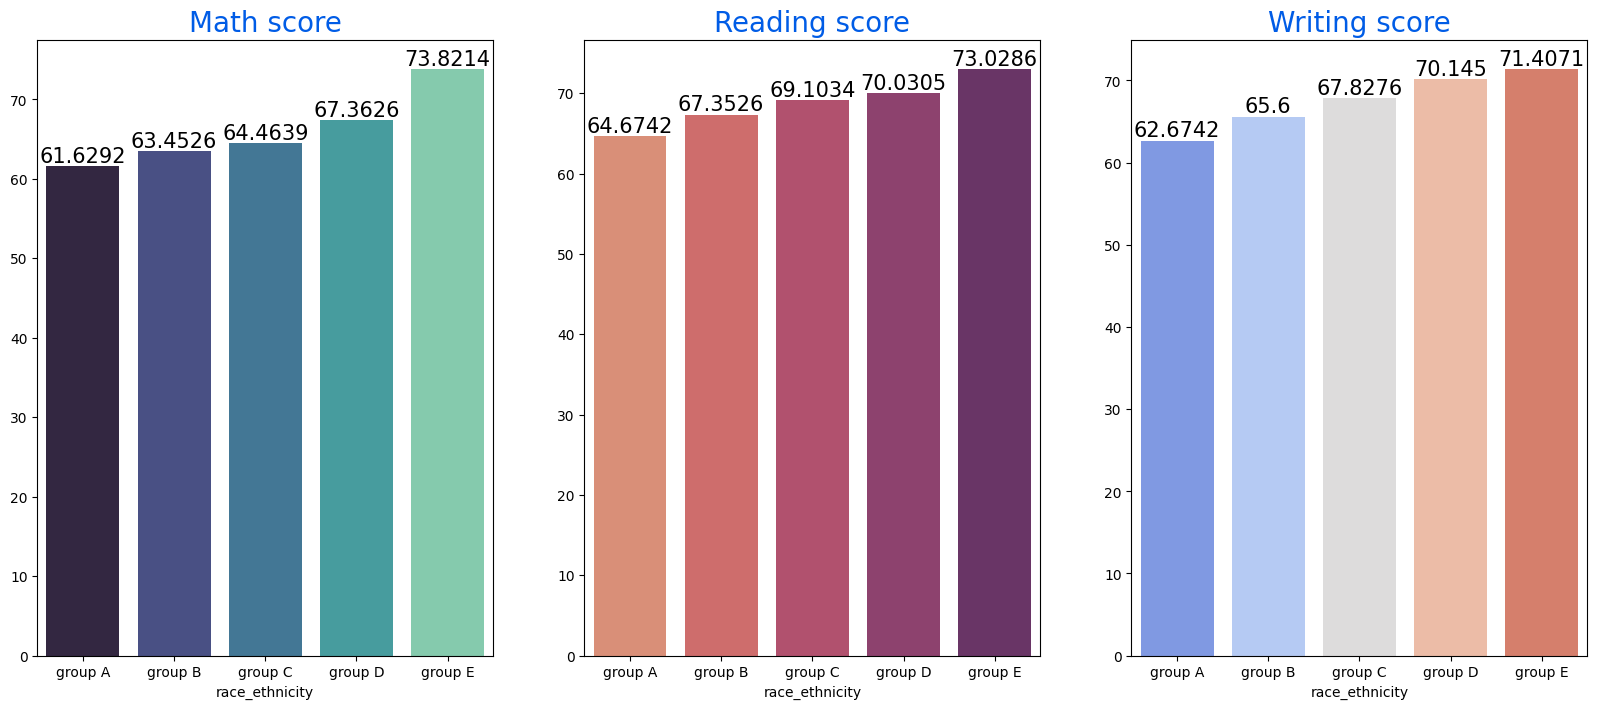

In [60]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

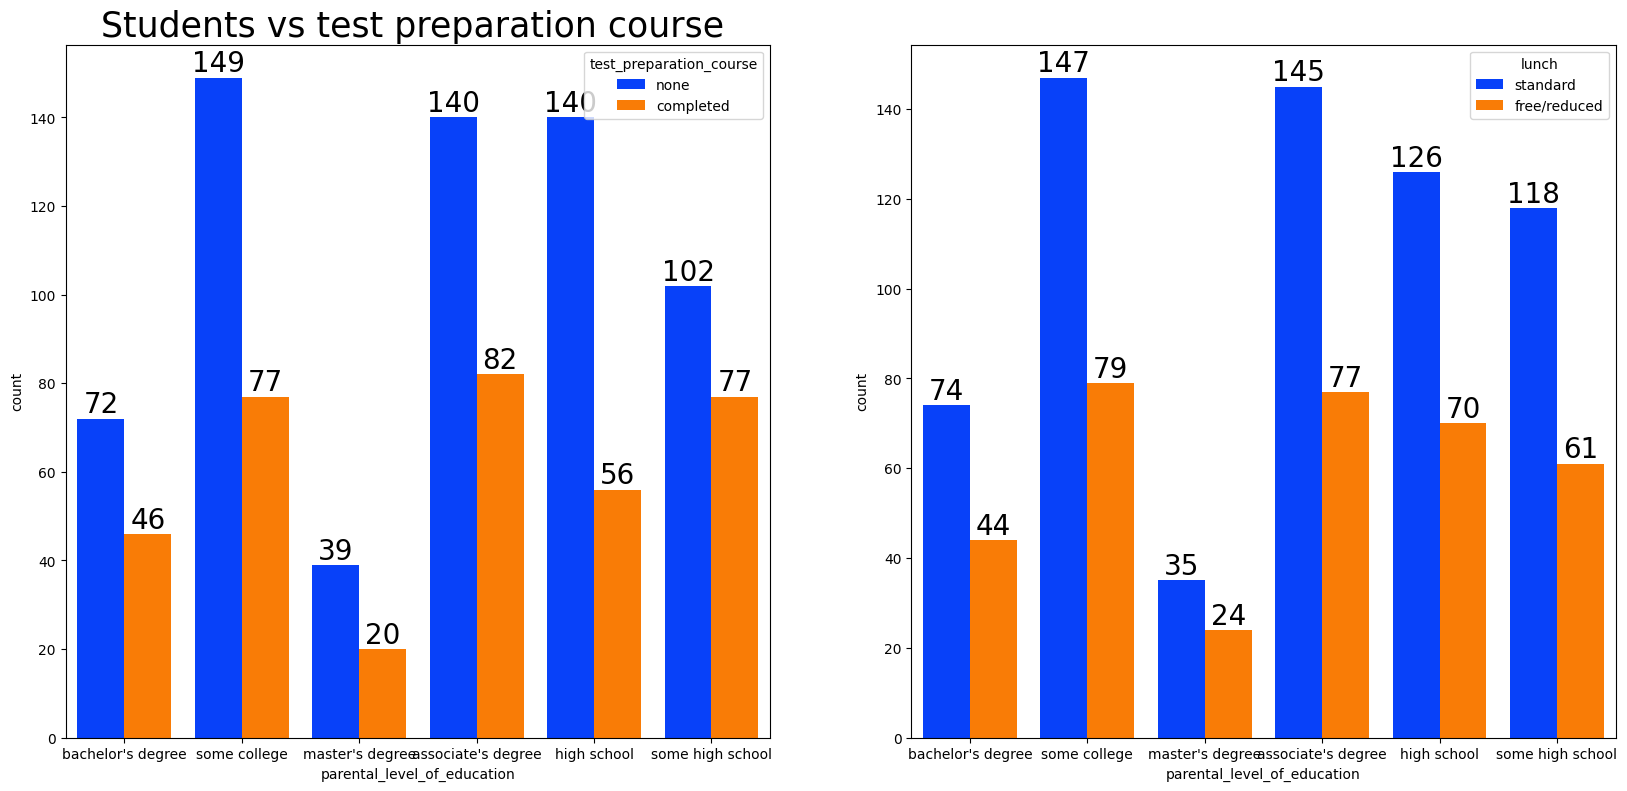

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,9))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

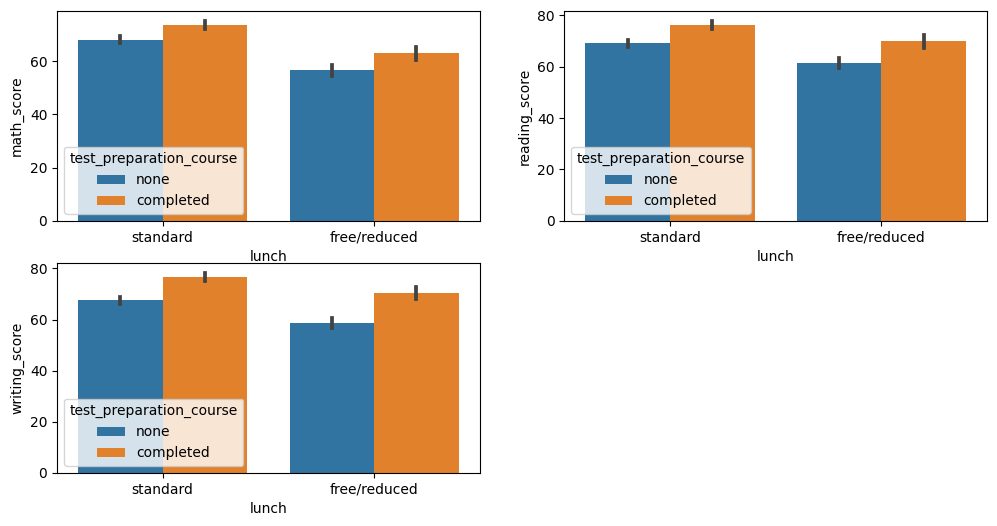

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

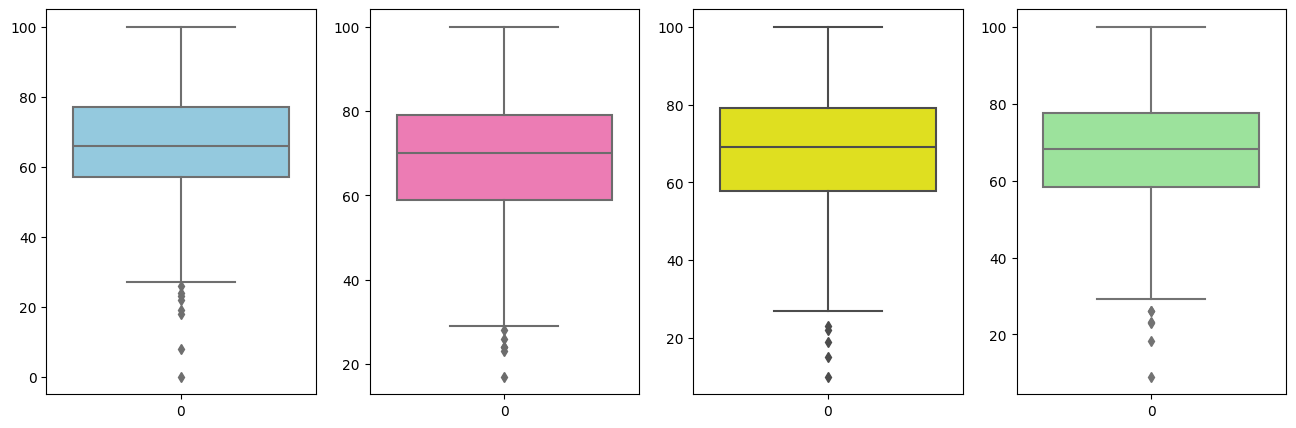

In [75]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

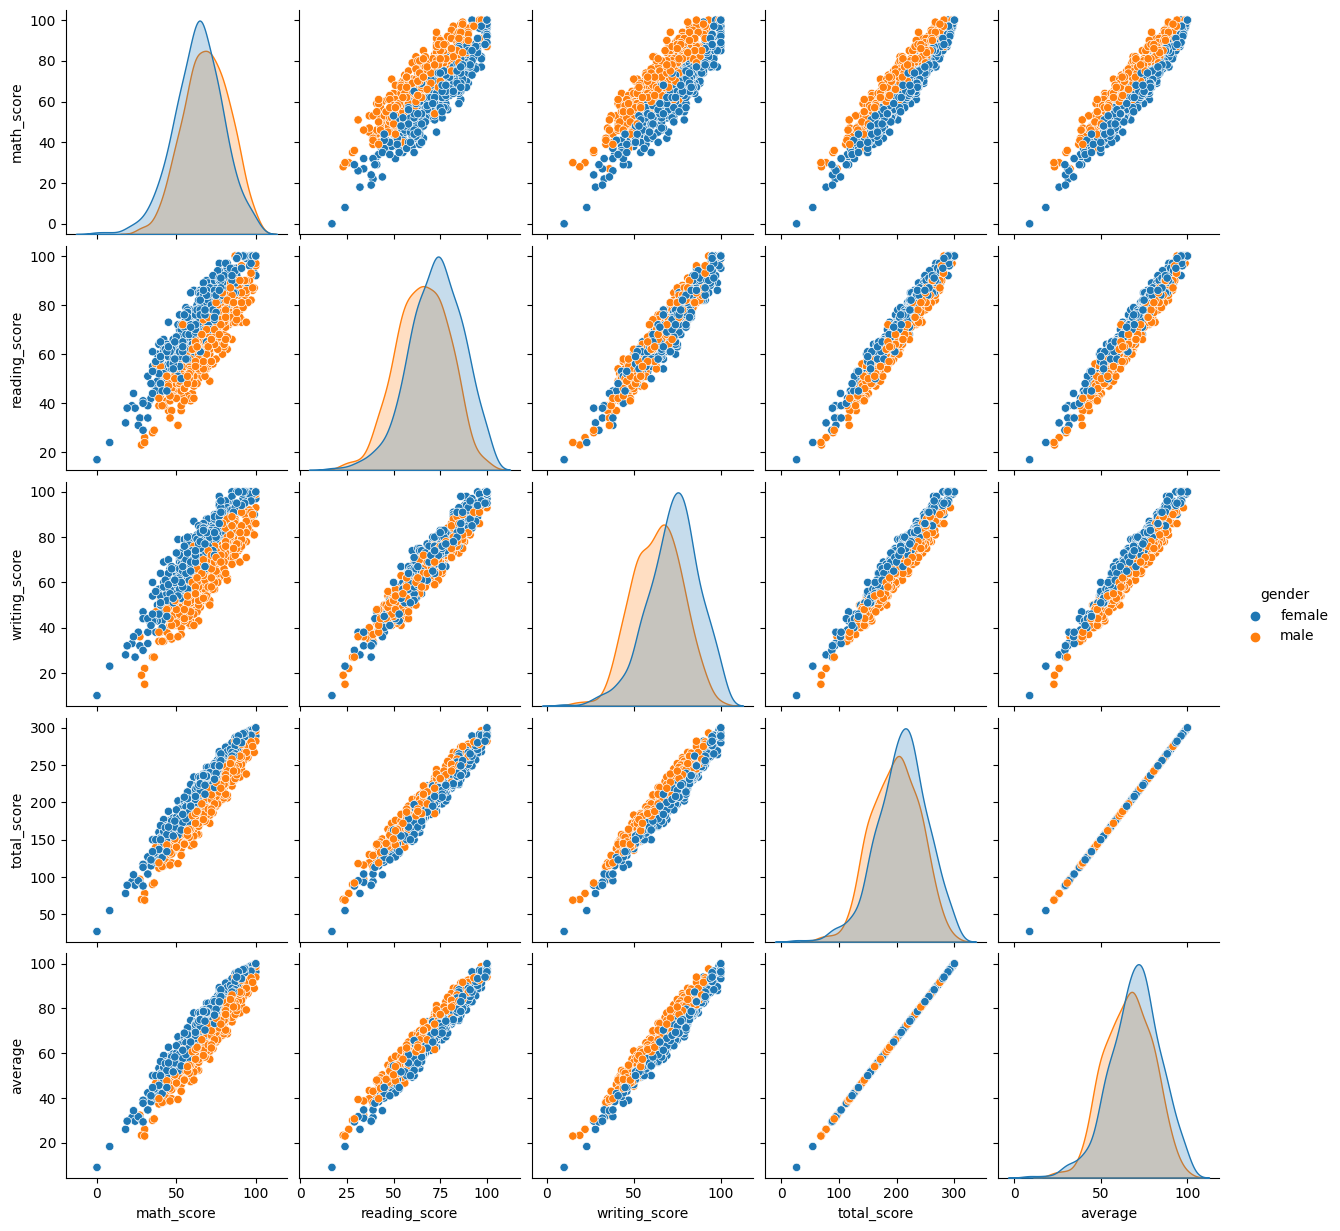

In [76]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
* From the above plot it is clear that all the scores increase linearly with each other.

Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.